In [2]:
import numpy as np 
import pandas as pd
import os

In [4]:
iris_data = pd.read_csv('Iris.csv')

In [5]:
def missing_value_describe(data):
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No misisng data!!!")
missing_value_describe(iris_data)

Number of columns with missing values: 0
No misisng data!!!


In [6]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_data = iris_data.drop(['Id'], axis=1)
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
print("the dimension:", iris_data.shape)

the dimension: (150, 5)


In [9]:
print(iris_data.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [10]:
print(iris_data.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

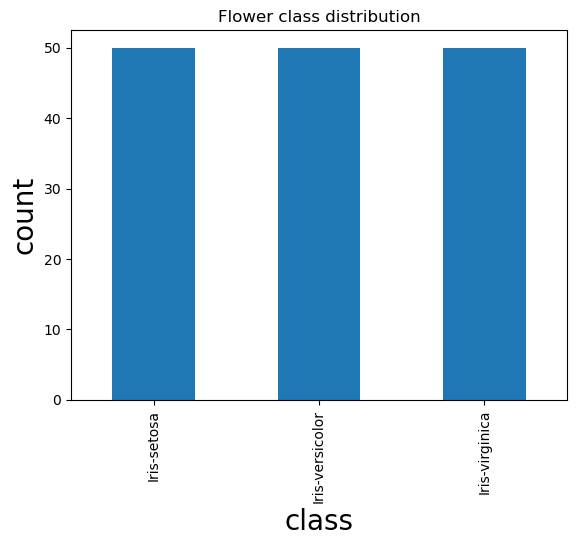

In [12]:
nameplot = iris_data['Species'].value_counts().plot.bar(title='Flower class distribution')
nameplot.set_xlabel('class',size=20)
nameplot.set_ylabel('count',size=20)

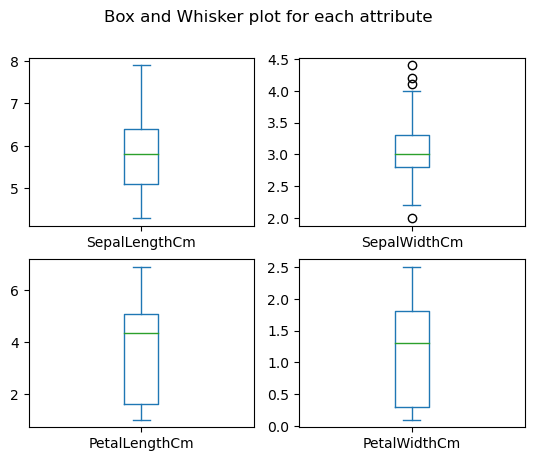

In [13]:
iris_data.plot(kind='box', subplots=True, layout=(2,2), 
               sharex=False, sharey=False, title="Box and Whisker plot for each attribute")
plt.show()

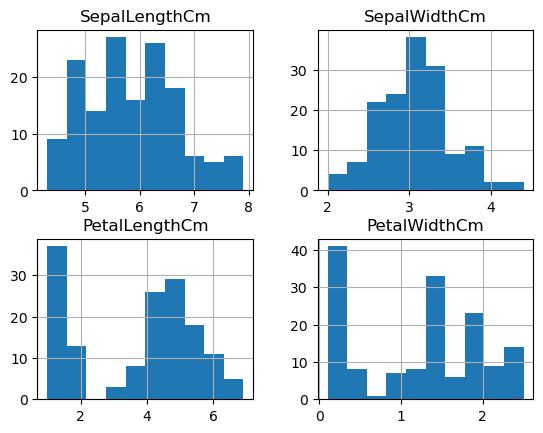

In [14]:
iris_data.hist()
plt.show()

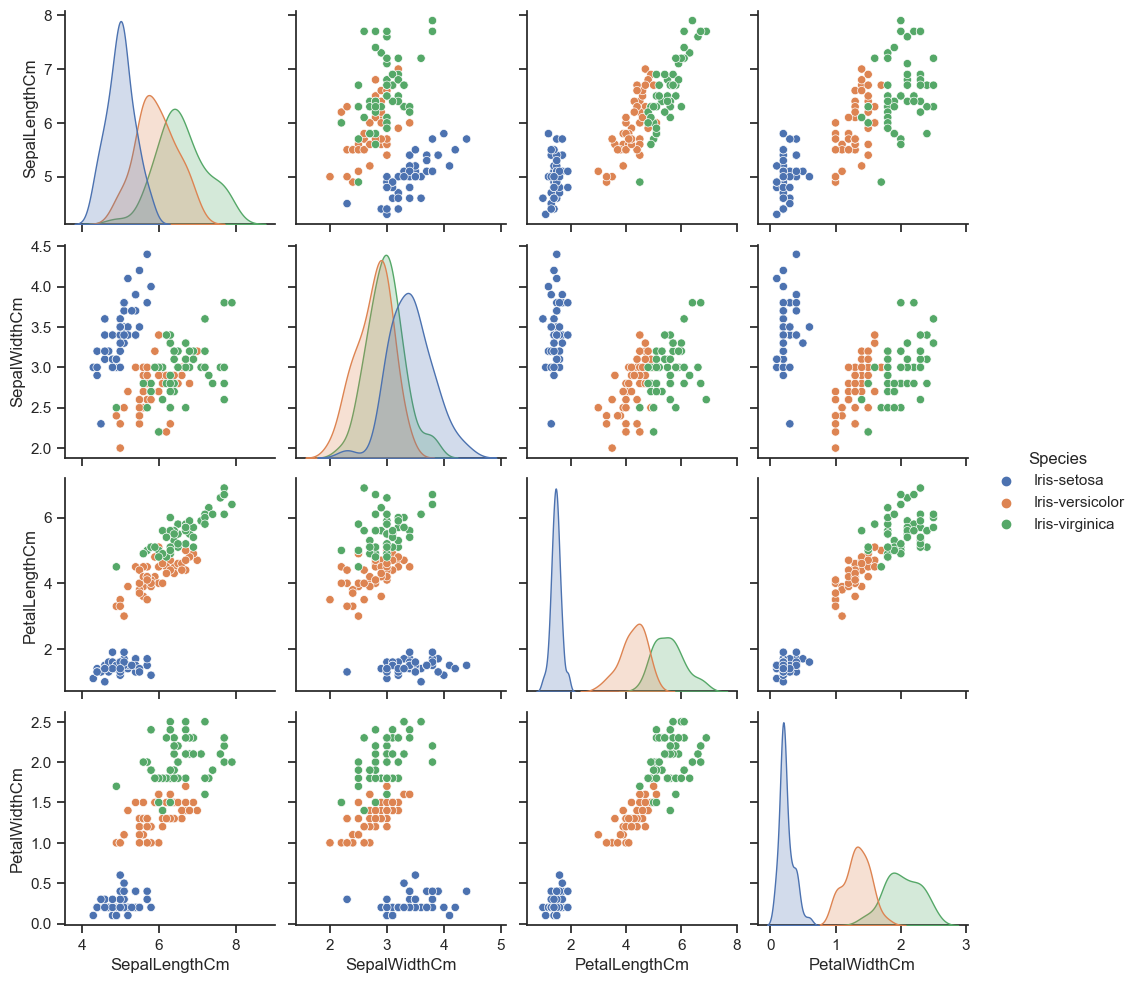

In [15]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(iris_data, hue="Species")

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = iris_data.drop(['Species'], axis=1)
Y = iris_data['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [18]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", X_train.shape)
print("Y_test.shape:", Y_test.shape)

X_train.shape: (120, 4)
X_test.shape: (30, 4)
Y_train.shape: (120, 4)
Y_test.shape: (30,)


In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

In [24]:
def test_model(model):
    model.fit(X_train, Y_train) # train the whole training set
    predictions = model.predict(X_test) # predict on test set
    
    # output model testing results
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))

In [25]:
for name, model in models:
    print("----------------")
    print("Testing", name)
    test_model(model)

----------------
Testing KNN
Accuracy: 0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

----------------
Testing GNB
Accuracy: 0.8333333333333334
Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   wei